<a href="https://colab.research.google.com/github/yustinaivanova/netology_statistics/blob/master/dz_1.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

Материалы Юстины Ивановой: https://github.com/yustinaivanova/netology_statistics_february_20

# Домашняя работа №3

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import scipy.stats as sts
%matplotlib inline
import statistics
import ssl

Загрузить датасет по url:


In [2]:
# следующая строчка подключает сертификат для защищенного соединения
ssl._create_default_https_context = ssl._create_unverified_context
# все данные загружаются с сервера
url="http://yustiks.ru/dataset/world-happiness-report-2019.csv"
df=pd.read_csv(url)

Более подробно о датасете можно прочитать по [данной ссылке](https://data.world/promptcloud/world-happiness-report-2019) или по [ссылке в kaggle](https://www.kaggle.com/PromptCloudHQ/world-happiness-report-2019)

Context

The World Happiness Report is a landmark survey of the state of global happiness that ranks 156 countries by how happy their citizens perceive themselves to be. This year’s World Happiness Report focuses on happiness and the community: how happiness has evolved over the past dozen years, with a focus on the technologies, social norms, conflicts and government policies that have driven those changes.



*  **Country (region)** Name of the country.
*  **Ladder** Cantril Ladder is a measure of life satisfaction.
*  **SD of Ladder** Standard deviation of the ladder.
*  **Positive affect** Measure of positive emotion.
*  **Negative affect** Measure of negative emotion.
*  **Social support** The extent to which Social support contributed to the calculation of the Happiness Score.
*  **Freedom** The extent to which Freedom contributed to the calculation of the Happiness Score.
*  **Corruption** The extent to which Perception of Corruption contributes to Happiness Score.
*  **Generosity** The extent to which Generosity contributed to the calculation of the Happiness Score.
*  **Log of GDP per capita** The extent to which GDP contributes to the calculation of the Happiness Score.
*  **Healthy life expectancy** The extent to which Life expectancy contributed to the calculation of the Happiness Score.

Посмотреть первые несколько рядов таблицы

In [3]:
df.head()

,Country (region),Ladder,SD of Ladder,Positive affect,Negative affect,Social support,Freedom,Corruption,Generosity,Log of GDP\nper capita,Healthy life\nexpectancy
0,Finland,1,4,41.0,10.0,2.0,5.0,4.0,47.0,22.0,27.0
1,Denmark,2,13,24.0,26.0,4.0,6.0,3.0,22.0,14.0,23.0
2,Norway,3,8,16.0,29.0,3.0,3.0,8.0,11.0,7.0,12.0
3,Iceland,4,9,3.0,3.0,1.0,7.0,45.0,3.0,15.0,13.0
4,Netherlands,5,1,12.0,25.0,15.0,19.0,12.0,7.0,12.0,18.0


Построить частотный график для двух параметров: Freedom и positive affect. Какое это распределение?

C:\Users\79851\anaconda3\lib\site-packages\numpy\lib\histograms.py:839: RuntimeWarning: invalid value encountered in greater_equal
  keep = (tmp_a >= first_edge)
C:\Users\79851\anaconda3\lib\site-packages\numpy\lib\histograms.py:840: RuntimeWarning: invalid value encountered in less_equal
  keep &= (tmp_a <= last_edge)


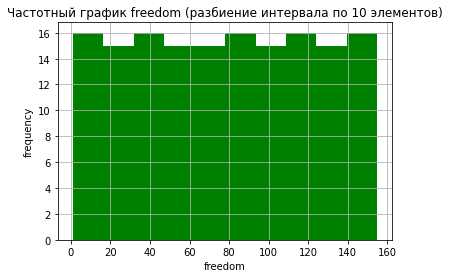

In [4]:
n, bins, patches = plt.hist(df['Freedom'], 10, facecolor='g')

plt.xlabel('freedom')
plt.ylabel('frequency')
plt.title('Частотный график freedom (разбиение интервала по 10 элементов)')
plt.grid(True)
plt.show()

#распределение близко к равномерному

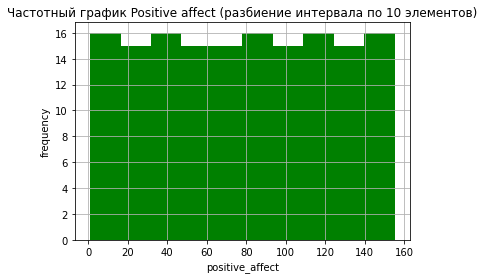

In [5]:
n, bins, patches = plt.hist(df['Positive affect'], 10, facecolor='g')

plt.xlabel('positive_affect')
plt.ylabel('frequency')
plt.title('Частотный график Positive affect (разбиение интервала по 10 элементов)')
plt.grid(True)
plt.show()

Найти медиану, моду, математическое ожидание, стандартное отклонение,  дисперсию, минимум и максимум, найти выбросы (если есть), размах для колонки Freedom

In [6]:
freedom = df['Freedom']

freedom.isna().sum()

1

In [7]:
freedom1 = freedom.dropna()

In [8]:
num_freedom = len(freedom1)

sorted_freedom = sorted(freedom1)

middle = (num_freedom // 2)
if num_freedom%2==0:
  result = (sorted_freedom[middle-1] + sorted_freedom[middle])/2
else:
  result = sorted_freedom[middle]

print('Медиана: ', result)

Медиана:  78.0


In [9]:
MLE = freedom1.mean()

print('Матожидание: ', MLE)

Матожидание:  78.0


In [10]:
st_dev = statistics.pstdev(freedom1)

print('Стандартное отклонение: ', st_dev)

Стандартное отклонение:  44.74371464239419


In [11]:
disp = statistics.pvariance(freedom1)

print('Дисперсия: ', disp)

Дисперсия:  2002.0


In [12]:
maxim = max(freedom1)

print('Максимум: ', maxim)

Максимум:  155.0


In [13]:
minim = min(freedom1)

print('Минимум: ', minim)

Минимум:  1.0


In [14]:
freedom_range = maxim - minim
print('Размах: ', freedom_range)

Размах:  154.0


Почему нельзя найти моду?

In [15]:
freedom_counts = {}
for p in freedom1:
    if p not in freedom_counts:
        freedom_counts[p] = 1
    else:
        freedom_counts[p] += 1

maxp = 0
mode_freedom = None
for k, v in freedom_counts.items():
    if maxp < v:
        maxp = v
        mode_freedom = k
print('Значение моды: ', mode_freedom, 'Количество встречаемости: ', maxp)

Значение моды:  5.0 Количество встречаемости:  1


Потому что мода - это наиболее вероятное (часто встречающееся) значение в выборке, а при равномерном распределении всё равновероятно.

Посмотреть корреляцию между Freedom и positive affect (графически и математически). Графически - plt.scatter, математически - посчитать коэффициент Пирсона. О чем говорит знак коэффициента?

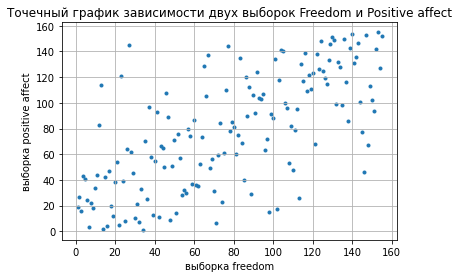

In [16]:
positive = df['Positive affect']
plt.xlabel('выборка freedom')
plt.ylabel('выборка positive affect')
plt.title('Точечный график зависимости двух выборок Freedom и Positive affect')
plt.grid(True)
plt.scatter(freedom, positive, marker='.')

In [20]:
from scipy.stats import pearsonr
import math

df=pd.read_csv(url)
positive = df['Positive affect']
freedom = df['Freedom']
def corrPirson(x, y):
    if len(x) == len(y):
        for i in reversed(range(len(x))):
            if math.isnan(x[i]):
                x.drop(i, inplace=True)
                y.drop(i, inplace=True)
            elif math.isnan(y[i]):
                y.drop(i, inplace=True)
                x.drop(i, inplace=True)
    else:
        print('Error')
    corr, p_value = pearsonr(x, y)
    return corr
        
print('Коэффициент Пирсона: ', corrPirson(freedom, positive))       

Коэффициент Пирсона:  0.6817698430601657


Знак коэффициента говорит о положительной корреляции - чем больше свобода, тем больше позитивных эмоций, и наоборот.

Нормализовать данные колонки Freedom (централизация + масштабирование)

In [23]:
freedom2 = freedom - statistics.mean(freedom)
statistics.mean(freedom2)

0.0

In [24]:
from sklearn import preprocessing
min_max_scaler = preprocessing.MinMaxScaler(feature_range=(-1,1))

freedom3 = min_max_scaler.fit_transform(np.array(freedom2).reshape(-1, 1))
print(min(freedom3))
print(max(freedom3))

[-1.]
[1.]


Построить матрицу корреляций для всех колонок таблицы

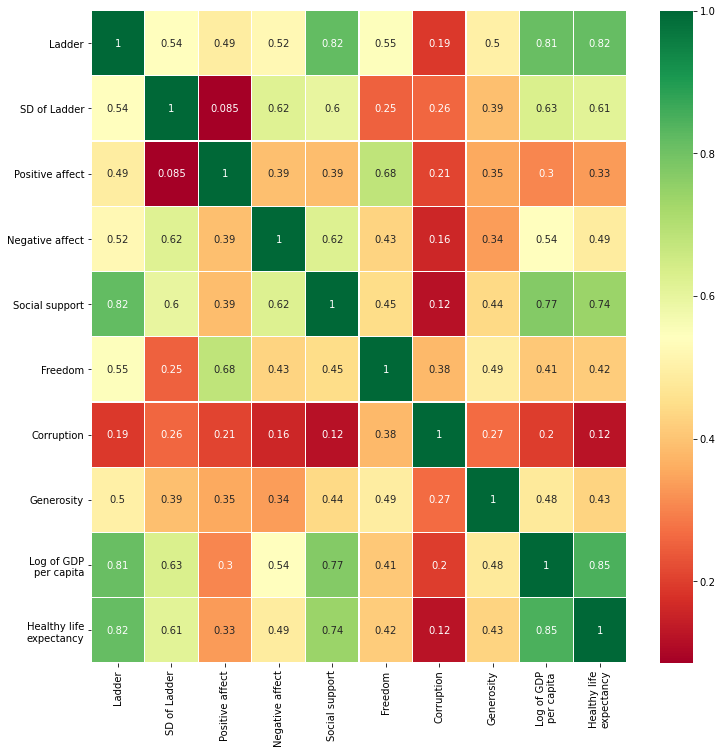

In [26]:
import seaborn as sns
sns.heatmap(df.corr(),annot=True,cmap='RdYlGn',linewidths=0.2)
fig=plt.gcf()
fig.set_size_inches(12,12)
plt.show()

Загрузить таблицу цен на авокадо: 

In [27]:
av=pd.read_csv('avocado.csv')
av[:3]

,Unnamed: 0,Date,AveragePrice,Total Volume,4046,4225,4770,Total Bags,Small Bags,Large Bags,XLarge Bags,type,year,region
0,0,2015-12-27,1.33,64236.62,1036.74,54454.85,48.16,8696.87,8603.62,93.25,0.0,conventional,2015,Albany
1,1,2015-12-20,1.35,54876.98,674.28,44638.81,58.33,9505.56,9408.07,97.49,0.0,conventional,2015,Albany
2,2,2015-12-13,0.93,118220.22,794.70,109149.67,130.50,8145.35,8042.21,103.14,0.0,conventional,2015,Albany


Сделать частотный график колонки AveragePrice. Какое это распределение?

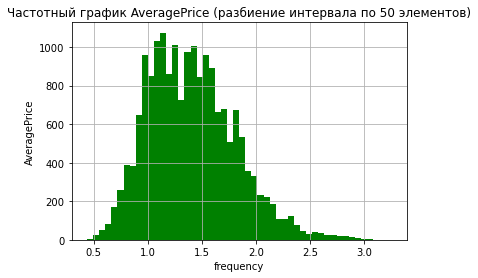

In [29]:
n, bins, patches = plt.hist(av['AveragePrice'], 50, facecolor='g')

plt.xlabel('frequency')
plt.ylabel('AveragePrice')
plt.title('Частотный график AveragePrice (разбиение интервала по 50 элементов)')
plt.grid(True)
plt.show()

График ближе к нормальному распределению.

Найти корреляцию в следующих колонках:

колонкой 4046, 4225, 4770 и Average Price. Если корелляция есть (обратная или прямая), то какие выводы можно сделать?

In [31]:
from sklearn import preprocessing
min_max_scaler = preprocessing.MinMaxScaler(feature_range=(0,1))

np_scaled = min_max_scaler.fit_transform(av[['4046', '4225', '4770', 'AveragePrice']])
av_norm = pd.DataFrame(np_scaled)
av_norm.head()

,0,1,2,3
0,0.000046,0.002660,0.000019,0.316726
1,0.000030,0.002181,0.000023,0.323843
2,0.000035,0.005332,0.000051,0.174377
3,0.000050,0.003516,0.000029,0.227758
4,0.000041,0.002142,0.000030,0.298932


In [32]:
fortysix = av_norm[0]
twentyfive = av_norm[1]
seventy = av_norm[2]
avgp = av_norm[3]

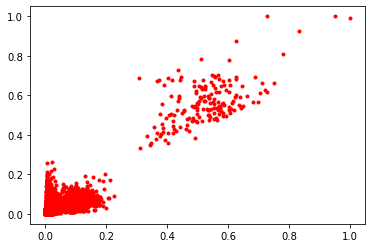

In [35]:
plt.plot(fortysix, twentyfive, 'r.')
plt.show()

In [34]:
corr, p_value = pearsonr(fortysix, twentyfive)
print(corr)

0.9261099558992295


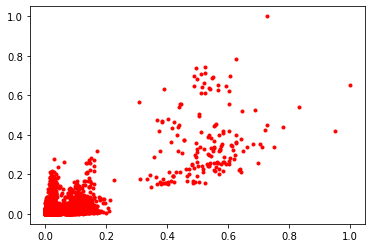

In [36]:
plt.plot(fortysix, seventy, 'r.')
plt.show()

In [37]:
corr, p_value = pearsonr(fortysix, seventy)
print(corr)

0.8333891041719166


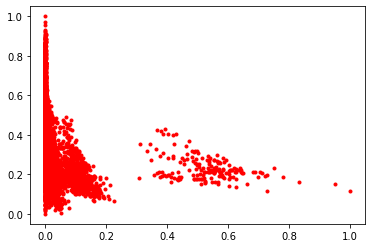

In [38]:
plt.plot(fortysix, avgp, 'r.')
plt.show()

In [39]:
corr, p_value = pearsonr(fortysix, avgp)
print(corr)

-0.2083170484878848


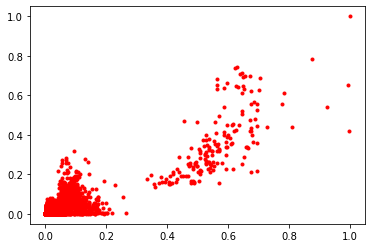

In [40]:
plt.plot(twentyfive, seventy, 'r.')
plt.show()

In [41]:
corr, p_value = pearsonr(twentyfive, seventy)
print(corr)

0.8878549976059534


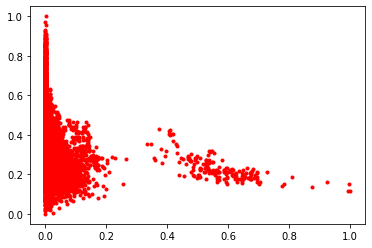

In [42]:
plt.plot(twentyfive, avgp, 'r.')
plt.show()

In [43]:
corr, p_value = pearsonr(twentyfive, avgp)
print(corr)

-0.17292777250933541


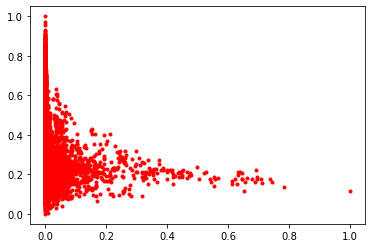

In [44]:
plt.plot(seventy, avgp, 'r.')
plt.show()

In [45]:
corr, p_value = pearsonr(seventy, avgp)
print(corr)

-0.17944598397975625


Между всеми колонками с общим количеством проданных авокадо разных видов наблюдается строгая прямая корреляция. Это значит, что чем больше покупают авокадо одного вида, тем больше покупают и другого. Однако между всеми проданными авокадо и средней на него ценой есть обратная корреляция. Это значит, что чем больше продают авокадо, тем больше падает цена на него. Это может означать, что когда цена на авокадо снижается, люди охотнее его покупают.